     Street Name  Segment Seq.  Segment ID    Maximo ID From Limit Street  \
0      KEARNS DR          30.0   5117317.0  401355839.0       PEARLMAN DR   
1  10TH 1/2 ST E           5.0   2033241.0  401498914.0               800   
2      10TH ST E           5.0   2018483.0  401533199.0      CONGRESS AVE   
3      10TH ST E          10.0   2018496.0  401518007.0         BRAZOS ST   
4      10TH ST E          15.0   2018512.0  401519191.0  SAN JACINTO BLVD   

    To Limit Street  Left From Address Full Street Name from GIS  \
0       HANDSOME DR            13400.0                 KEARNS DR   
1     SAN MARCOS ST              800.0            E 10TH HALF ST   
2         BRAZOS ST              100.0                 E 10TH ST   
3  SAN JACINTO BLVD              200.0                 E 10TH ST   
4        TRINITY ST              300.0                 E 10TH ST   

  Street End Type Functional Class  ...  Right To Address  \
0             NaN      Residential  ...           13421.0   
1     

C:\Users\Zack\AppData\Local\Temp\ipykernel_32488\4288663653.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Final_Grade', order=grade_counts.index, palette='viridis')


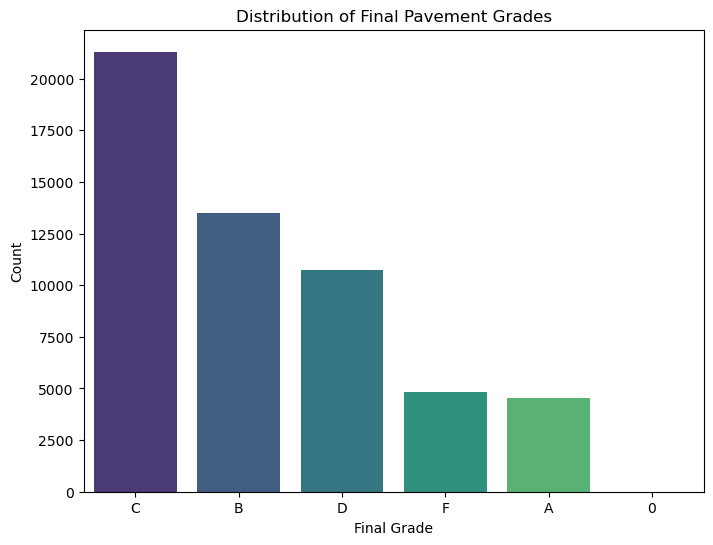

Final_Grade
0    439.000000
A    528.957532
B    525.514347
C    484.238066
D    452.366850
F    401.388155
Name: Segment Length, dtype: float64


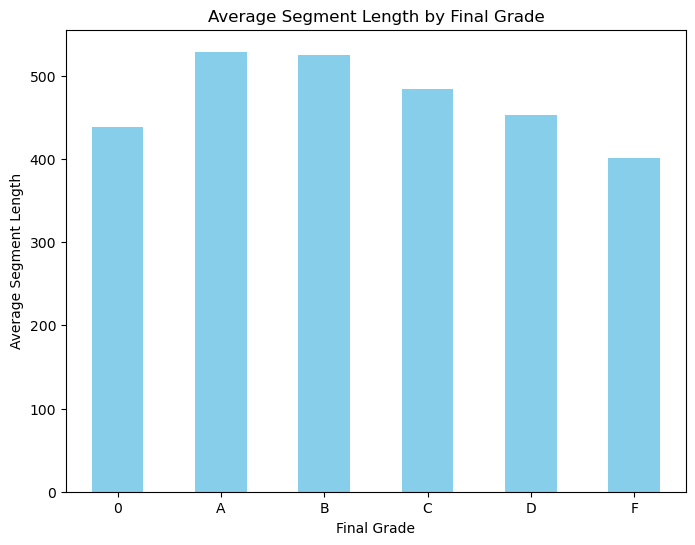

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('grading_2.csv')

# Display the first few rows of the dataframe
print(df.head())

# Analyze the distribution of 'Final_Grade'
grade_counts = df['Final_Grade'].value_counts()
print(grade_counts)

# Plot the distribution of 'Final_Grade'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Final_Grade', order=grade_counts.index, palette='viridis')
plt.title('Distribution of Final Pavement Grades')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

# Calculate the average segment length for each grade
average_length_by_grade = df.groupby('Final_Grade')['Segment Length'].mean()
print(average_length_by_grade)

# Plot the average segment length by grade
plt.figure(figsize=(8, 6))
average_length_by_grade.plot(kind='bar', color='skyblue')
plt.title('Average Segment Length by Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Average Segment Length')
plt.xticks(rotation=0)
plt.show()


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



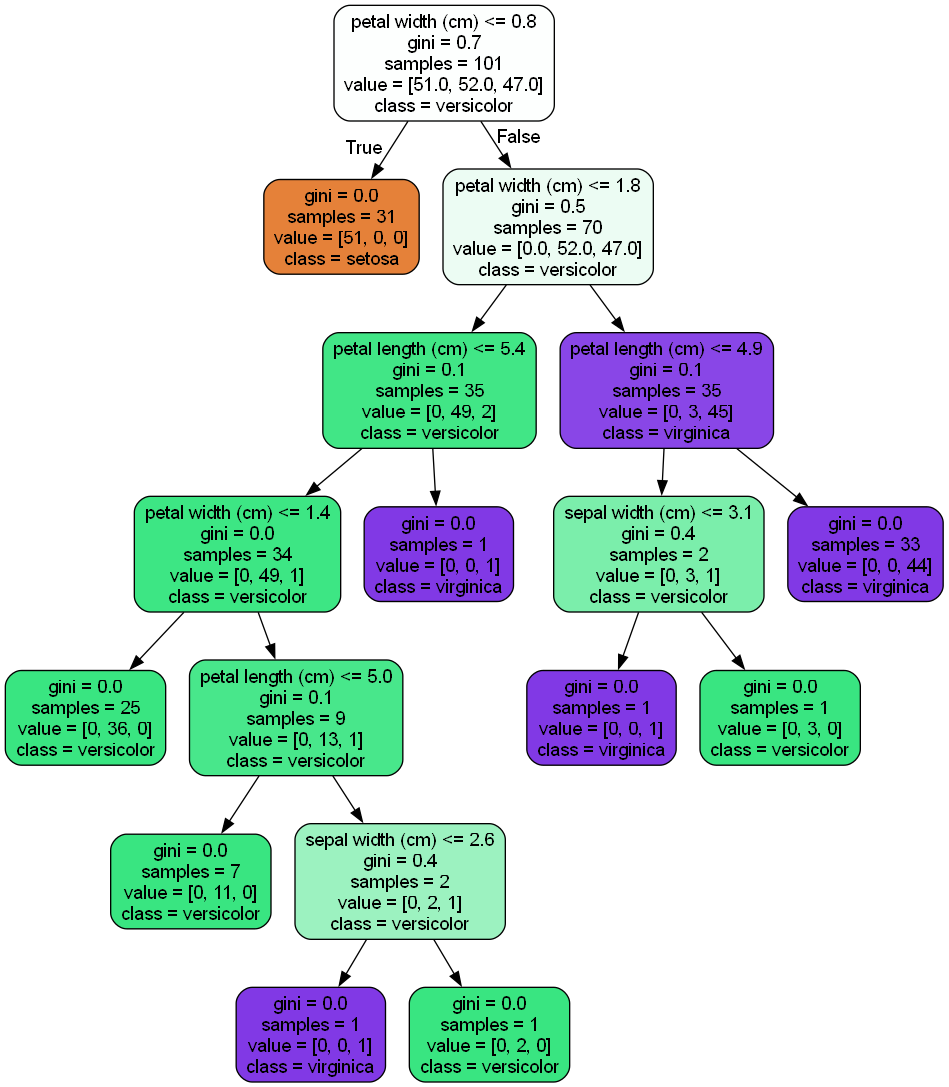

In [2]:
%pip install pydot
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X, y)

# Extract a single tree from the forest
tree = rf.estimators_[0]

# Export the tree to a dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names=iris.feature_names, 
                class_names=iris.target_names, 
                rounded=True, precision=1, filled=True)

# Convert the dot file to a png file
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Display the tree image
Image(filename='tree.png')
